# [Computational Social Science]
## 4-1 Clustering and PCA - Student Version

People use unseprscised learning for old techniques and using patersn identified to be added into a larger analysis. This is a useful tool in sociology using PCA create and idex of gentifiers. 

Clustering is an unsuperivsed ML method used to group data points based on their features alone, and no observed grouping labels as in supervised classification. Thus most clustering alorithms seeks to group points by their distance in a high dimensional space generated by provided features.

Below is a plot showing the results of the clustering algorithms in Scikit-Learn for several different toy datasets.

Showing how each algorithims wil do clustering on diff types of data. The more idosycnratic distros are not soemthing you will run into often. For example the top two row is not captrued by k means well but can be estiamted withDBSCAN. Changing parameters will still give a better fit. 

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>

## Virtual Environment
Remember to always activate your virtual environment first before you install packages or run a notebook! This helps to prevent conflicts between dependencies across different projects and ensures that you are using the correct versions of packages. You must have created anaconda virtual enviornment in the `Anaconda Installation` lab. If you have not or want to create a new virtual environment, follow the instruction in the `Anaconda Installation` lab. If you have already created a virtual enviornment, you can run the following command to activate it. <br>
`conda activate <virtual_env_name>`
For example, if your virtual environment was named as css_lab, run the following command. <br>
`conda activate css_lab`
To deactivate your virtual environment after you are done working with the lab, run the following command. <br>
`conda deactivate`

### 1) K-means clustering  

In this section we will cover k-means clustering using `scikit-learn`. The scikit-learn documentation for clustering is found [here](http://scikit-learn.org/stable/modules/clustering.html).

First we'll import `KMeans` and `numpy` so that we can make our arrays. The `%matplotlib inline` will make our plots show up within the notebook.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll start off with a few points arranged in an array.

In [2]:
# asterick unpacks we save to variable X
X = np.array([[0,1], [1,2], [1, 0], [-1, -3],
             [15, 21], [18, 30], [20, 20], [22, 19],
             [45, 50], [42, 48], [60, 40], [50, 50]])
X

array([[ 0,  1],
       [ 1,  2],
       [ 1,  0],
       [-1, -3],
       [15, 21],
       [18, 30],
       [20, 20],
       [22, 19],
       [45, 50],
       [42, 48],
       [60, 40],
       [50, 50]])

If we plot them we can see that they appear to be arranged roughly in three groups. *Note: the asterisk is used for "unpacking" the two lists in `X.T` into the function call of `plt.scatter`*.

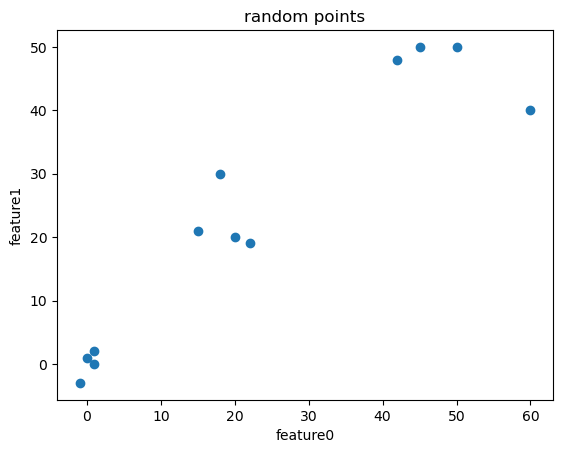

In [3]:
# This is the transpostion with putting or data in geometric space. 

plt.scatter(*X.T)
plt.title('random points')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

To get our clusters, all we have to do is specify how many we want, and then fit the model to the data. We'll choose 3. We can also specify the maximum number of iterations of the k-means algorithm, which you may want to do with a much larger dataset.

First thing's first: **set a random seed!**

In [ ]:
# set a random seed
np.random.seed(10)

Now we can create the model. We'll use the [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) methods from sklearn.

In [9]:
# specify k-means algo and set it to soemthing later. We are also fitting here. N_Clisters is the amount of cluster
# we seen. Th n int is the number if iterations or ran with different centroid seeds and average profess 
#is coducted to move poitns in distance to irginal seed then move seeds over and create the clsuter 

# max interations how many times fit will be done
# specify kmeans algorithm
# ----------
kmeans = KMeans(n_clusters=3,
                n_init=10,
                max_iter=300 #default
                ).fit(X)

We can access the centers of the clusters through the `cluster_centers_` attribute. To get the labels (i.e. the corresponding cluster) we use `labels_`.

In [10]:
# print the centers 
print("Centers")
print(kmeans.cluster_centers_)
print()

# print labels
print("Labels")
print(kmeans.labels_)
print()

# print coordinates and labels 
for point, label in zip(X, kmeans.labels_):
    print("Coordinates:", point, "Label:", label)

Centers
[[ 0.25  0.  ]
 [49.25 47.  ]
 [18.75 22.5 ]]

Labels
[0 0 0 0 2 2 2 2 1 1 1 1]

Coordinates: [0 1] Label: 0
Coordinates: [1 2] Label: 0
Coordinates: [1 0] Label: 0
Coordinates: [-1 -3] Label: 0
Coordinates: [15 21] Label: 2
Coordinates: [18 30] Label: 2
Coordinates: [20 20] Label: 2
Coordinates: [22 19] Label: 2
Coordinates: [45 50] Label: 1
Coordinates: [42 48] Label: 1
Coordinates: [60 40] Label: 1
Coordinates: [50 50] Label: 1


Now let's also plot out cluster centers along with the points.

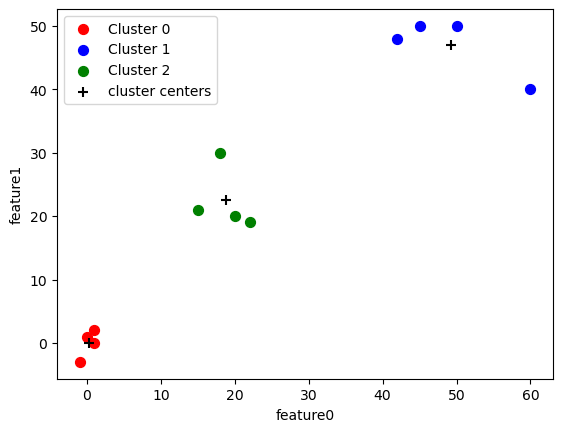

In [11]:
# plot the centers along with the points by cluster
# ----------

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot
ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, marker='+', c='black', label='cluster centers')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

If we want to see to which cluster a new point would belong, we simply use the `predict` method.

Predictions:

0, 4
Cluster: [0]

19, 25
Cluster: [2]

40, 50
Cluster: [1]


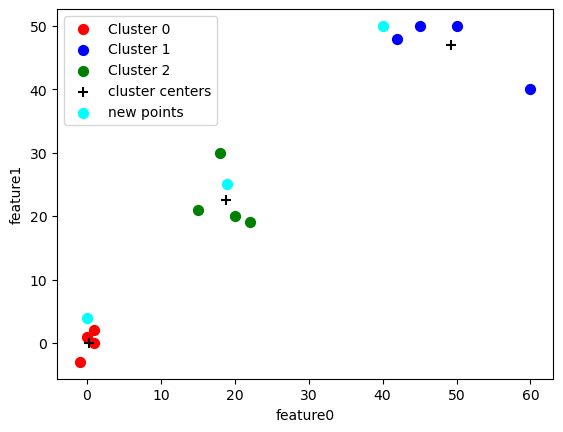

In [12]:
# predict to see which cluster a new point would belong
# ----------

# create new points
new_points = np.asarray([[0, 4],
                        [19, 25],
                        [40, 50]])

# print predictions
print("Predictions:")
print()

print("0, 4")
print("Cluster:", kmeans.predict([[0, 4]]))
print()

print("19, 25")
print("Cluster:", kmeans.predict([[19, 25]]))
print()

print("40, 50")
print("Cluster:", kmeans.predict([[40, 50]]))

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot new points
ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, c='black', marker='+', label='cluster centers')
ax1.scatter(*new_points.T, s=50, c='cyan', label='new points')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

### 2) Agglomerative clustering

Now we'll show an example of agglomerative clustering, which is a type of hierarchical clustering. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) in case you want to know more about the parameters. We'll use some of scikitlearn's toy datasets.

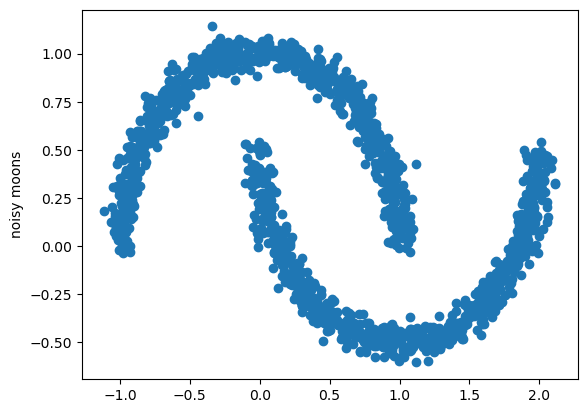

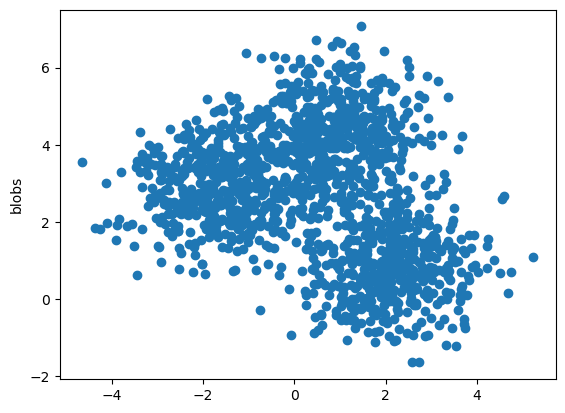

In [20]:
# We wil create two new datasets. We will look at this method will clsuter compared to previous. 
# Given the structutre we will need to identify the best method and with best fit.

# load library 
# ----------
from sklearn import datasets

# set samples . we are creating a bunch of samples for the data set.
n_samples = 1500

# create synthetic datasets: moons and blob dataset
# ----------

# moons. This moons dataset this argument is a specfic type of structure. We will use it for both data sets.
#
noisy_moons = datasets.make_moons(n_samples=n_samples, 
                                  noise=.05)[0]

# blobs
blobs, blob_truth = datasets.make_blobs(n_samples=n_samples, 
                                        random_state=0)

# plot each dataset
plt.scatter(*noisy_moons.T)
plt.ylabel('noisy moons')
plt.show()

plt.scatter(*blobs.T)
plt.ylabel('blobs')
plt.show()

We'll use two clusters this time, and use ward linkage.

In [40]:
# load library
# we will try to fit this on the noisey moon data. Lets assume there are 3 clusters
# ----------
from sklearn.cluster import AgglomerativeClustering

# run algorithm
# ----------
ward = AgglomerativeClustering(n_clusters=3,
                               linkage='ward', #linkage can be ward (default), complete, or average. This tries to reduce error 
                                               # Remember the dendograp where we collaped groups.
                               metric='euclidean') #affinity must be euclidean if linkage=ward

Now we'll fit the clustering model on the dataset.

In [41]:
# fit to moons data 
# ----------
ward.fit(noisy_moons)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

Here we'll sort the points by label and then plot them.

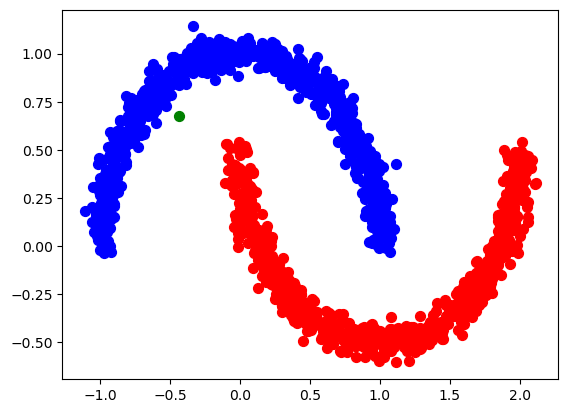

In [37]:
# plot 

# It does not do a great job of identifying the clusters
# We see it did bad because there are four and the red is split in a 
# ----------

# sort by labels
zero = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 2])

# plot 
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label ='two')
plt.show()

Now we'll do the same with the blobs dataset.

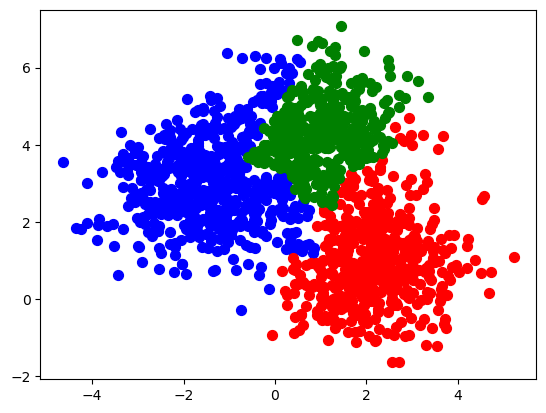

In [17]:
# fit to blob data 

# We will use the same algorithim using aloggor using ward.
# ----------
ward.fit(blobs)

# plot 
# Look at the clusters how would we make sense of this with education and income data. How would we make sense of it\
# This depends on the theory being applied to intepet these groups. 
# Hiarchial clustering does good on blob but not the moon.  This depdens on what alogirthim is trying to do. 
# ----------

# sort by labels
zero = np.array([point for label, point in zip(ward.labels_, blobs) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, blobs) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, blobs) if label == 2])

# plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label='two')
plt.show()

### Challenge: DBSCAN 


It looks like our agglomerative clustering model did not cluster the noisy moons dataset how we might have wanted. For the challenge, use [`DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to cluster noisy moons. Then plot the results and see what it looks like. Try an `eps` value of .2. This sets the maximum distance between two samples for them to be considered in the same neighborhood.

In [46]:
# load library
# ----------
from sklearn.cluster import DBSCAN

# define model object
# ----------
dbscan = DBSCAN(eps=.2)

# fit model to data 
# ----------
dbscan.fit(noisy_moons);

In [47]:
# get fitted labels for each data point 
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
# identify number of labels and their unique score. 2 clusters or labels and have values of 0 and 1
print(len(set(labels)))
print(np.unique(labels))


2
[0 1]


Check if there any outliers not included in either cluster. They will have a value of -1. Additionally, the count will be not match what we found above if there are outliers.



In [55]:
# get inferred clusters 
# This will help us look for outliers whoich we want to bring them into a larger closter or can leave them in their
# own cluster. See how it changed from 2 to 19. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # outliers will have different values
n_clusters_ 

19

Let's plot the results

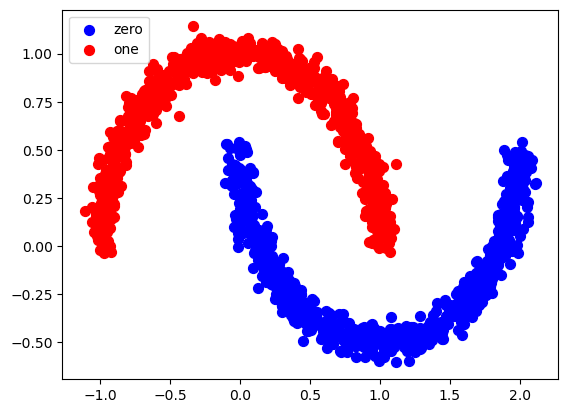

In [50]:
# split data into those for each cluster 
# ----------
zero = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 1])

# plot 
# ----------

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot the data with cluster assignment as the color 
ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.legend(loc='upper left')
plt.show()



Now let's fit another DBSCAN model to the blobs data.

In [66]:
# define model object
# eps standard is .5. sET S MAX DISTANCE BETWEEN TWO POINTS TO BE A NEIGHBOR. Ours is much smaller. How far should
# points be to consider them neighbors.
# ----------
dbscan = DBSCAN(eps=0.2)

# fit model to data 
# ----------
dbscan.fit(blobs)

DBSCAN(eps=0.2)

In [67]:
# get fitted labels for each data point 
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 4, 0])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Again, see if there are outliers not included in any cluster. The difference between the two code chunks will indicate if there are outliers and they will take a value of -1.

In [68]:
# identify number of labels and their unique score
print(len(set(labels)))
print(np.unique(labels))

20
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [69]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

19

And let's plot the points in the blobs dataset, coloring them by their cluster id.

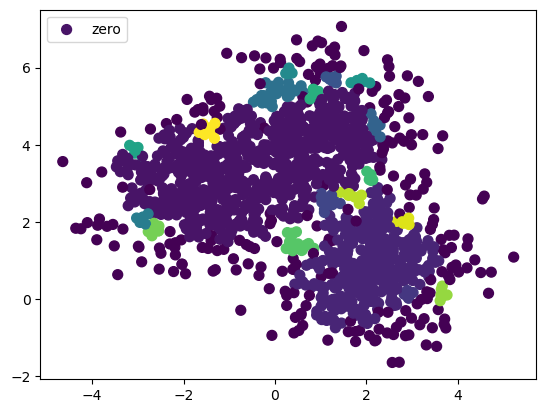

In [70]:
# plot 
# ----------
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(blobs[:,0],blobs[:,1], s=50, c=labels, label='zero')

plt.legend(loc='upper left')
plt.show()

## Principal Component Analysis

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is an unsupervised machine learning technique. At a basic level, it summarizes information in many features by collapsing them into fewer features. PCA can be used for both exploratory data analysis and dimensionality reduction. For this exercise, we are going to use the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn. First, let's load in the data:

In [ ]:
# load libraries
# ----------
from sklearn.datasets import load_breast_cancer

# process data
# ----------
breast = load_breast_cancer()

# create an array of features 
breast_data = breast.data

# create array of target data
breast_labels = breast.target

# reshape target array
labels = np.reshape(breast_labels,(569,1))

# concatenate features and labels
final_breast_data = np.concatenate([breast_data,labels],axis=1)

# get feature names
features = breast.feature_names
features_labels = np.append(features,'label')

# coerce to dataframe and add column names
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = features_labels

In [ ]:
# Check out first 5 rows
breast_dataset.head()

Let's take a look at the "label" column that will be our target:

In [ ]:
# view label column
breast_dataset['label'].unique()

Let's recode 0 to "benign" and 1 to "malignant" to make these more clear:

In [ ]:
# recode labels
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

As with supervised methods, scaling our data in advance is usually a good idea. Apply the sklearn [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the features in our dataframe and save the result as an array called "X":

In [ ]:
# load library 
# ----------
from sklearn.preprocessing import StandardScaler

# scale data
# ----------
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) 

Now let's apply our PCA! Use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method from sklearn to perform a PCA on the breast cancer features and summarize them with two components.

In [ ]:
# load library 
# ----------
from sklearn.decomposition import PCA

# apply PCA
# ----------
pca = PCA(n_components=2)
principalComponents_breast = pca.fit_transform(X)

In [ ]:
# convert into a dataframe
# ----------
pca_df = pd.DataFrame(data = principalComponents_breast, 
                      columns = ['principal component 1', 
                                 'principal component 2'])

In [ ]:
# view factor loadings as dataframe
pca_df.head()

In [ ]:
# plot
# ----------

# figure settings
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

# loop over targets and colors to create scatterplot
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# show figure
plt.legend(targets,prop={'size': 15})
plt.show();


### Supervised Learning

Train a logistic regression that predicts the label using all of the features. Then train a second logistic regression model that uses only the principal components as features. How do the confusion matrices compare?

In [ ]:
# load libraries
# ----------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#
# with all features
# --------------------------------------------------------

# create target dataset
# ----------
y = breast_dataset['label'] 


# create features dataset - give it a different name so we can reuse it in the second step for PCA
# ----------
X_original = breast_dataset.drop(['label'], axis = 1)


# split data
# ----------
X_train, X_test, y_train, y_test = train_test_split(X_original,       # specify features dataset
                                                    y,                # specify labels dataset
                                                    train_size = .80, # specify training dataset size
                                                    test_size=0.20,   # specify testing dataset size
                                                    random_state=10)  # set random seed


# initalize a logistic regresssion model
# ----------
logit_reg = LogisticRegression(max_iter= 5000) 


# fit the model to the training data
# ----------
logit_model = logit_reg.fit(X_train, 
                            y_train)

# predict on test set
# ----------
y_pred = logit_model.predict(X_test)


# create a confusion matrix
# ----------
cf_matrix = confusion_matrix(y_test,              # test
                             y_pred,              # predictions
                             normalize='true')    # make sure to normalize


# create a pandas dataset from the confusion matrix
# ----------
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))


# plot the confusion matrix
# ----------
df_cm = df_cm.rename(index=str, 
                     columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')


# specify labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#
# With PCA Features
# --------------------------------------------------------


# load libraries
# ----------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# create target dataset
# ----------
y = breast_dataset['label']


# create features dataset 
# ----------
X = pca_df


# split data
# ----------
X_train, X_test, y_train, y_test = train_test_split(X,                # specify features
                                                    y,                # specify labels
                                                    train_size = .80, # specify training data
                                                    test_size=0.20,   # specify test data
                                                    random_state=10)  # set seed

# initalize a logistic regresssion model
# ----------
logit_reg = LogisticRegression(max_iter= 5000) 


# fit the model
# ----------
logit_model = logit_reg.fit(X_train, 
                            y_train)

# predict on test set
# ----------
y_pred = logit_model.predict(X_test)

# create a confusion matrix
# ----------
cf_matrix = confusion_matrix(y_test, 
                             y_pred, 
                             normalize='true')

# create a pandas dataframe from the confusion matrix
# ----------
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))

# plot the confusion matrix
# ----------
df_cm = df_cm.rename(index=str, 
                     columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# specify labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Question**: How did the logistic regression trained on just the PCA features compare to the original?

**Answer**:

---
Authored by Aniket Kesari. Materials borrowed from D-Lab's [Python Machine Learning Workshop](https://github.com/dlab-berkeley/python-machine-learning/blob/master/3_clustering.ipynb), and [datacamp](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python). 